Training Batches: 100%|██████████| 113/113 [00:24<00:00,  4.66batch/s]


Final Model Accuracy: 0.9463


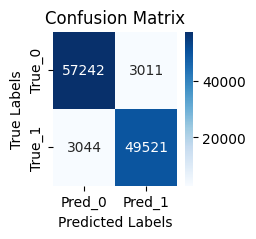


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     60253
           1       0.94      0.94      0.94     52565

    accuracy                           0.95    112818
   macro avg       0.95      0.95      0.95    112818
weighted avg       0.95      0.95      0.95    112818

ROC AUC Score: 0.9870


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')  # To ignore all warnings

# Load the data using pandas
file_path = 'cluster_new_raw_test.csv'
df = pd.read_csv(file_path)

# Drop unnecessary column
df.drop(columns=['id'], inplace=True)

# Show first few rows
df.head()

# Check the distribution of target variable
y = df['Cluster']
y.value_counts()

# Define target column and features
target_column = 'Cluster'
X = df.drop(columns=[target_column])
y = df[target_column]

# Apply standardization (scaling) to the features
scaler = StandardScaler()  # Create the StandardScaler object
X = scaler.fit_transform(X)  # Apply scaling

# Split the data into train and test (using sklearn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Training loop with batch processing
batch_size = 3000 
n_batches = len(X_train) // batch_size + (1 if len(X_train) % batch_size != 0 else 0)

# Progress tracking with tqdm
for batch_idx in tqdm(range(n_batches), desc="Training Batches", unit="batch"):
    # Get the start and end indices for this batch
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, len(X_train))

    # Slice the training data for this batch
    X_batch = X_train[start_idx:end_idx]
    y_batch = y_train[start_idx:end_idx]

    # Train on this batch
    model.fit(X_batch, y_batch)

# Evaluate the model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred_0', 'Pred_1'], yticklabels=['True_0', 'True_1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# For Binary Classification: ROC AUC Score
# (Note: Use if this is a binary classification task, otherwise you can omit this)
if len(y.unique()) == 2:  # Check if this is binary classification
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC Score: {roc_auc:.4f}")
